In [ ]:
#importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [ ]:
#creating data for clustering
X, y = make_blobs(n_samples = 1000, centers = 3, n_features=2)
X

array([[ -9.83263154,   2.22355984],
       [ -7.43836614,   1.1079349 ],
       [-10.1665339 ,   3.37277279],
       ...,
       [  8.18796906,  -2.96059293],
       [ -5.92179862,  -3.81793255],
       [ -3.40198384,  -3.91723299]])

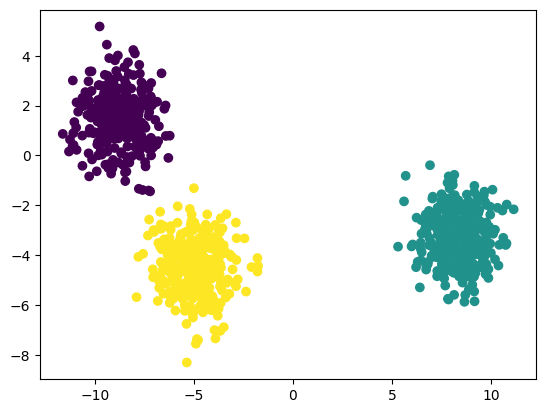

In [ ]:
#visualizing data
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#split train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#implementing kmeans
from sklearn.cluster import KMeans

In [ ]:
#elbow method to select k value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

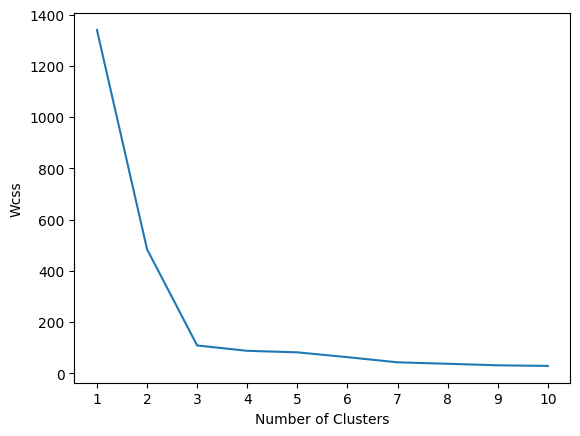

In [ ]:
#visualizing wcss
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show()

In [ ]:
#fitting kmeans with 3 clusters
kmeans = KMeans(n_clusters = 3, init = "k-means++")
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [ ]:
#making predictions
y_pred = kmeans.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

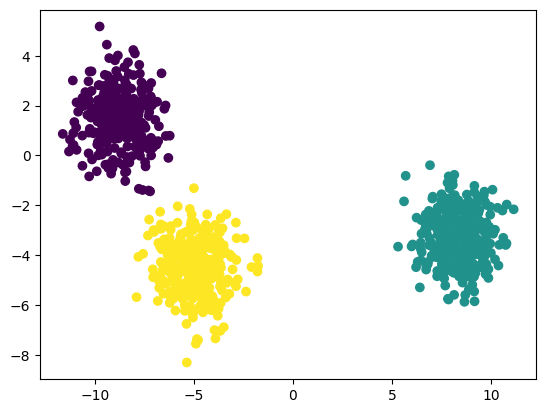

In [ ]:
#visualizing data with predicted clusters
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
#validating the k value
## 1. kneelocator
## 2. silhouette scoring


In [ ]:
## kneelocator
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve = "convex", direction = "decreasing")

In [ ]:
kl.elbow

np.int64(3)

In [ ]:
#silhoette scoring
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

[np.float64(0.6154586502859486),
 np.float64(0.7522339548042306),
 np.float64(0.6528674250655999),
 np.float64(0.5514656015958965),
 np.float64(0.4582068918297423),
 np.float64(0.4343690515778936),
 np.float64(0.42231343188193765),
 np.float64(0.40368228953068713),
 np.float64(0.3867478792603859)]

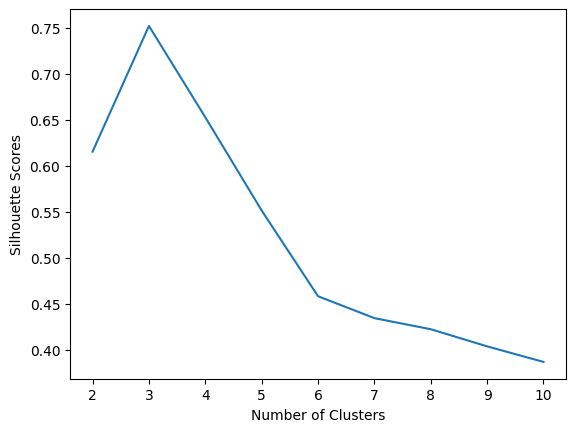

In [ ]:
#visualizings silhouette score
plt.plot(range(2,11), silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.show()